In [1]:
from Bio import SeqIO
import sys
import re
import pandas as pd
import gzip
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def BC_counts(path, counts_dict):
    with gzip.open(path, 'rt') as fq:
        for record in SeqIO.parse(fq, 'fastq'):
            read = str(record.seq).upper()
# Find BC by adjacent seq
# Edit adjacent seq as needed
# Edit BC RegEx as needed
            findBC = re.search(r'GGCAGAGGGAAAAAGATC(([AT][GC]){9})', read)
            if findBC:
                BC = findBC.group(1)
                if BC in counts_dict:
                    counts_dict[BC] += 1
    return counts_dict

In [3]:
Barcodes_dict_count = {}
with open("/home/lvand1/reporter-barcoding-nf/results/barcode_table/Twist_RCallBCs_enh_empty_filtered.txt", 'r') as bc:
    table = pd.read_csv(bc, comment='#', sep='\t', header = None)
    table.columns = ['Barcode', 'ID']
with open("/home/lvand1/reporter-barcoding-nf/results/barcode_table/Twist_RCallBCs_enh_empty_filtered.txt", 'r') as bc:
    for line in bc:
        line = line.rstrip()
        (Barcode, ID) = line.split("\t")
        Barcodes_dict_count[Barcode]=0
table

,Barcode,ID
0,TCTGTGACACTGTGAGAG,Abca4_pilot_chr1:94160888-94161133
1,TGAGACTGACTGTGTCAC,Abca4_pilot_chr1:94160888-94161133
2,ACAGTCAGTCTGTGAGAG,Abca4_pilot_chr1:94160888-94161133
3,TCACAGTCACACAGAGAG,Abca4_pilot_chr1:94160888-94161133
4,ACTCTCTGTCTCAGTCTC,Abca4_pilot_chr1:94160888-94161133
...,...,...
52279,TCTGAGACACACACACAC,empty
52280,TGAGAGACACACACACAC,empty
52281,TCAGAGACACACACACAC,empty
52282,AGAGTCACACACACACAC,empty


In [4]:
counts_1 = BC_counts('/active/cherry_t/091923_LVBM_data/Twist_pDNA_S2_L001_R1_001.fastq.gz', Barcodes_dict_count)
counts_2 = BC_counts('/active/cherry_t/091923_LVBM_data/Twist_pDNA_S2_L001_R2_001.fastq.gz', Barcodes_dict_count)
counts_3 = BC_counts('/active/cherry_t/091923_LVBM_data/Twist_pDNA_S2_L002_R1_001.fastq.gz', Barcodes_dict_count)
counts_4 = BC_counts('/active/cherry_t/091923_LVBM_data/Twist_pDNA_S2_L002_R2_001.fastq.gz', Barcodes_dict_count)

In [ ]:
DNA_counts = {}
for BC in Barcodes_dict_count:
    total_counts = counts_1[BC] + counts_2[BC] + counts_3[BC] + counts_4[BC]
    DNA_counts[BC] = total_counts
print(DNA_counts)

In [6]:
table['pDNA_counts']= table['Barcode'].map(DNA_counts)
table

,Barcode,ID,pDNA_counts
0,TCTGTGACACTGTGAGAG,Abca4_pilot_chr1:94160888-94161133,0
1,TGAGACTGACTGTGTCAC,Abca4_pilot_chr1:94160888-94161133,0
2,ACAGTCAGTCTGTGAGAG,Abca4_pilot_chr1:94160888-94161133,60
3,TCACAGTCACACAGAGAG,Abca4_pilot_chr1:94160888-94161133,0
4,ACTCTCTGTCTCAGTCTC,Abca4_pilot_chr1:94160888-94161133,0
...,...,...,...
52279,TCTGAGACACACACACAC,empty,560
52280,TGAGAGACACACACACAC,empty,2324
52281,TCAGAGACACACACACAC,empty,464
52282,AGAGTCACACACACACAC,empty,128


In [7]:
table.to_csv("/active/cherry_t/091923_LVBM_data/Twist_pDNA/Twist_pDNA_Barcode_counts_partial_plusempty_121123.txt", sep='\t', index=False)

In [8]:
counts_5 = BC_counts('/active/cherry_t/091923_LVBM_data/Twist_cDNA_S1_L001_R1_001.fastq.gz', Barcodes_dict_count)
counts_6 = BC_counts('/active/cherry_t/091923_LVBM_data/Twist_cDNA_S1_L001_R2_001.fastq.gz', Barcodes_dict_count)
counts_7 = BC_counts('/active/cherry_t/091923_LVBM_data/Twist_cDNA_S1_L002_R1_001.fastq.gz', Barcodes_dict_count)
counts_8 = BC_counts('/active/cherry_t/091923_LVBM_data/Twist_cDNA_S1_L002_R2_001.fastq.gz', Barcodes_dict_count)

In [9]:
cDNA_counts = {}
for BC in Barcodes_dict_count:
    total_counts = counts_5[BC] + counts_6[BC] + counts_7[BC] + counts_8[BC]
    cDNA_counts[BC] = total_counts

In [10]:
table['cDNA_counts']= table['Barcode'].map(cDNA_counts)
table

,Barcode,ID,pDNA_counts,cDNA_counts
0,TCTGTGACACTGTGAGAG,Abca4_pilot_chr1:94160888-94161133,0,0
1,TGAGACTGACTGTGTCAC,Abca4_pilot_chr1:94160888-94161133,0,0
2,ACAGTCAGTCTGTGAGAG,Abca4_pilot_chr1:94160888-94161133,60,64
3,TCACAGTCACACAGAGAG,Abca4_pilot_chr1:94160888-94161133,0,0
4,ACTCTCTGTCTCAGTCTC,Abca4_pilot_chr1:94160888-94161133,0,20
...,...,...,...,...
52279,TCTGAGACACACACACAC,empty,560,24552
52280,TGAGAGACACACACACAC,empty,2324,30560
52281,TCAGAGACACACACACAC,empty,464,3980
52282,AGAGTCACACACACACAC,empty,128,688


In [11]:
#pDNA_counts = pd.read_csv("/active/cherry_t/091923_LVBM_data/Twist_pDNA/Twist_pDNA_Barcode_counts_partial_plusempty_121123.txt", sep='\t')
#pDNA_counts

,Barcode,ID,pDNA_counts
0,TCTGTGACACTGTGAGAG,Abca4_pilot_chr1:94160888-94161133,0
1,TGAGACTGACTGTGTCAC,Abca4_pilot_chr1:94160888-94161133,0
2,ACAGTCAGTCTGTGAGAG,Abca4_pilot_chr1:94160888-94161133,60
3,TCACAGTCACACAGAGAG,Abca4_pilot_chr1:94160888-94161133,0
4,ACTCTCTGTCTCAGTCTC,Abca4_pilot_chr1:94160888-94161133,0
...,...,...,...
52279,TCTGAGACACACACACAC,empty,560
52280,TGAGAGACACACACACAC,empty,2324
52281,TCAGAGACACACACACAC,empty,464
52282,AGAGTCACACACACACAC,empty,128


In [12]:
#All_counts_table = table.merge(pDNA_counts, on=['Barcode', 'ID'])
#All_counts_table['cDNA_counts'].sum()

905707716

In [20]:
All_counts_table = table.copy()
All_counts_table

,Barcode,ID,pDNA_counts,cDNA_counts
0,TCTGTGACACTGTGAGAG,Abca4_pilot_chr1:94160888-94161133,0,0
1,TGAGACTGACTGTGTCAC,Abca4_pilot_chr1:94160888-94161133,0,0
2,ACAGTCAGTCTGTGAGAG,Abca4_pilot_chr1:94160888-94161133,60,64
3,TCACAGTCACACAGAGAG,Abca4_pilot_chr1:94160888-94161133,0,0
4,ACTCTCTGTCTCAGTCTC,Abca4_pilot_chr1:94160888-94161133,0,20
...,...,...,...,...
52279,TCTGAGACACACACACAC,empty,560,24552
52280,TGAGAGACACACACACAC,empty,2324,30560
52281,TCAGAGACACACACACAC,empty,464,3980
52282,AGAGTCACACACACACAC,empty,128,688


In [21]:
Counts_above10 = All_counts_table.loc[All_counts_table['pDNA_counts'] >= 10].copy()
Counts_above10

,Barcode,ID,pDNA_counts,cDNA_counts
2,ACAGTCAGTCTGTGAGAG,Abca4_pilot_chr1:94160888-94161133,60,64
18,AGACACAGAGTCACTCTC,Abca4_pilot_chr1:94160888-94161133,16,48
22,TGTGAGAGAGAGTCAGTC,Abca4_pilot_chr1:94160888-94161133,12,12
31,TGAGTGTGACAGACACTC,Abca4_pilot_chr1:94160888-94161133,96,104
32,TGAGTCACTGTCACACAC,Abca4_pilot_chr1:94160888-94161133,1580,1728
...,...,...,...,...
52279,TCTGAGACACACACACAC,empty,560,24552
52280,TGAGAGACACACACACAC,empty,2324,30560
52281,TCAGAGACACACACACAC,empty,464,3980
52282,AGAGTCACACACACACAC,empty,128,688


In [22]:
Counts_above10['Normalized_Counts'] = Counts_above10['cDNA_counts'] / Counts_above10['pDNA_counts']
Counts_above10

,Barcode,ID,pDNA_counts,cDNA_counts,Normalized_Counts
2,ACAGTCAGTCTGTGAGAG,Abca4_pilot_chr1:94160888-94161133,60,64,1.066667
18,AGACACAGAGTCACTCTC,Abca4_pilot_chr1:94160888-94161133,16,48,3.000000
22,TGTGAGAGAGAGTCAGTC,Abca4_pilot_chr1:94160888-94161133,12,12,1.000000
31,TGAGTGTGACAGACACTC,Abca4_pilot_chr1:94160888-94161133,96,104,1.083333
32,TGAGTCACTGTCACACAC,Abca4_pilot_chr1:94160888-94161133,1580,1728,1.093671
...,...,...,...,...,...
52279,TCTGAGACACACACACAC,empty,560,24552,43.842857
52280,TGAGAGACACACACACAC,empty,2324,30560,13.149742
52281,TCAGAGACACACACACAC,empty,464,3980,8.577586
52282,AGAGTCACACACACACAC,empty,128,688,5.375000


In [23]:
Counts_above10.to_csv("/active/cherry_t/091923_LVBM_data/Twist_Normalized_Counts_regexcount_plusempty.txt", sep='\t', index=False)

In [ ]:
#Counts_above10 = pd.read_csv("/active/cherry_t/091923_LVBM_data/Twist_Normalized_Counts_regexcount_plusempty.txt", sep='\t')
#Counts_above10

In [24]:
Counts_above10['mean'] = Counts_above10.groupby('ID')['Normalized_Counts'].transform('mean')
Counts_above10['median'] = Counts_above10.groupby('ID')['Normalized_Counts'].transform('median')
Counts_above10.sort_values('median', ascending = False, inplace= True)
Counts_above10

,Barcode,ID,pDNA_counts,cDNA_counts,Normalized_Counts,mean,median
30130,TCTGTCACTCAGACACTG,EOMES_Conserved_chr3:27633114-27633359,12,12,1.000000,4.250000,4.250000
30147,AGACACACTGACAGACAC,EOMES_Conserved_chr3:27633114-27633359,16,120,7.500000,4.250000,4.250000
29244,TCAGAGACAGACACAGAC,Eya2_Enhancer1_chr20:47125584-47125829,28,64,2.285714,6.534261,1.780303
29159,TGAGAGAGAGACTGTCTG,Eya2_Enhancer1_chr20:47125584-47125829,20,20,1.000000,6.534261,1.780303
29235,TGACACTCAGAGACTGAC,Eya2_Enhancer1_chr20:47125584-47125829,12,68,5.666667,6.534261,1.780303
...,...,...,...,...,...,...,...
30125,TGACTGTGACAGACACAC,Eya2_Enhancer3_chr20:46979151-46979396,40,40,1.000000,1.152381,1.000000
30124,TGACTGTGTGAGACACAC,Eya2_Enhancer3_chr20:46979151-46979396,28,40,1.428571,1.152381,1.000000
30096,ACACTGAGAGAGTGACAG,Eya2_Enhancer3_chr20:46979151-46979396,12,12,1.000000,1.152381,1.000000
30081,AGACTGTCACTCACTGTG,Eya2_Enhancer3_chr20:46979151-46979396,1596,1596,1.000000,1.152381,1.000000


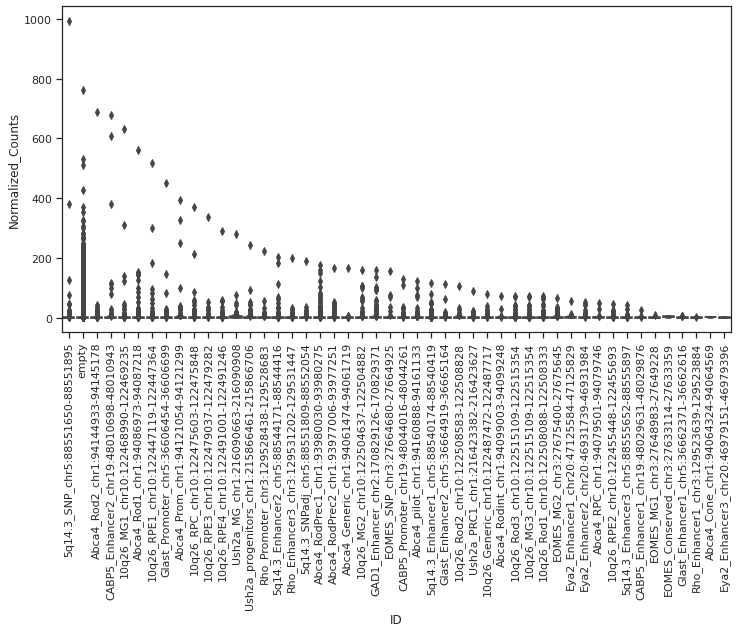

In [26]:
Twist_counts_sorted = Counts_above10.sort_values(by='Normalized_Counts', ascending=False)
# plotting
sns.set(style='ticks')
plt.figure(figsize=(12,6))
plot_all = sns.boxplot(x='ID',
                  y='Normalized_Counts',
                  data = Twist_counts_sorted)
plot_all.tick_params(axis = 'x', rotation=90)

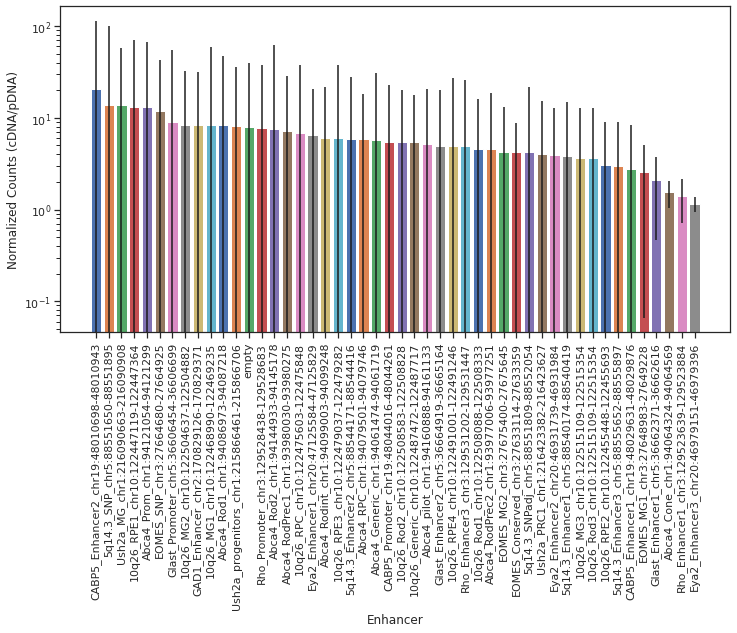

In [27]:
mean_counts = Counts_above10.groupby('ID')['Normalized_Counts'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
for ID in mean_counts.index:
    data = Counts_above10[Counts_above10['ID'] == ID]['Normalized_Counts']
    plt.bar(ID, data.mean(), yerr=data.std())
plt.yscale('log')
plt.tick_params(axis = 'x', rotation=90)
plt.xlabel('Enhancer')
plt.ylabel('Normalized Counts (cDNA/pDNA)')
plt.show()

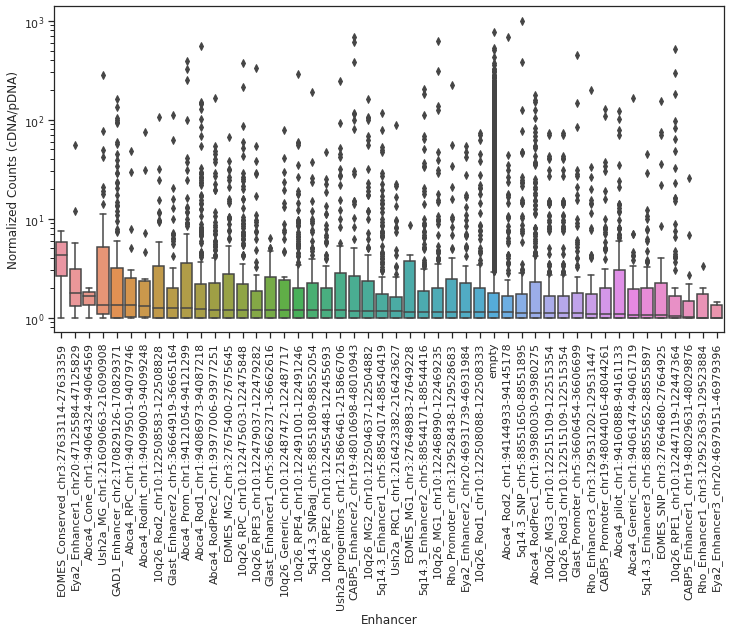

In [28]:
Counts_above10.sort_values('median', ascending = False, inplace= True)
sns.set(style='ticks')
plt.figure(figsize=(12,6))
plot_all = sns.boxplot(x='ID',
                  y='Normalized_Counts',
                  data = Counts_above10)
plt.yscale('log')
plot_all.tick_params(axis = 'x', rotation=90)
plt.xlabel('Enhancer')
plt.ylabel('Normalized Counts (cDNA/pDNA)')
plt.savefig("/active/cherry_t/Manuscripts/In Preparation/2024_scATAC_ML/Twist_Counts_above10_boxplot_plusempty.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [29]:
Counts_above10.describe()

,pDNA_counts,cDNA_counts,Normalized_Counts,mean,median
count,1.034900e+04,1.034900e+04,10349.000000,10349.000000,10349.000000
mean,1.593161e+04,8.745037e+04,7.366117,7.366117,1.150002
std,9.757783e+05,2.306644e+06,33.059439,2.497941,0.067338
min,1.200000e+01,1.200000e+01,1.000000,1.152381,1.000000
25%,1.600000e+01,2.800000e+01,1.000000,5.911290,1.136364
50%,3.600000e+01,7.200000e+01,1.142857,7.908920,1.136364
75%,1.160000e+02,2.760000e+02,1.964286,7.908920,1.142857
max,9.849891e+07,1.429135e+08,992.200000,20.616347,4.250000


In [30]:
Counts_above10['ID'].value_counts()

empty                                         5290
Abca4_RodPrec1_chr1:93980030-93980275          287
Abca4_Rod1_chr1:94086973-94087218              279
5q14.3_Enhancer1_chr5:88540174-88540419        236
10q26_MG1_chr10:122468990-122469235            208
10q26_RPC_chr10:122475603-122475848            205
5q14.3_Enhancer2_chr5:88544171-88544416        201
10q26_MG3_chr10:122515109-122515354            198
10q26_Rod3_chr10:122515109-122515354           198
10q26_RPE4_chr10:122491001-122491246           194
Abca4_RodPrec2_chr1:93977006-93977251          191
GAD1_Enhancer_chr2:170829126-170829371         167
Abca4_pilot_chr1:94160888-94161133             157
Abca4_Rod2_chr1:94144933-94145178              155
5q14.3_SNP_chr5:88551650-88551895              154
10q26_Rod1_chr10:122508088-122508333           140
5q14.3_SNPadj_chr5:88551809-88552054           126
EOMES_MG2_chr3:27675400-27675645               121
10q26_RPE3_chr10:122479037-122479282           118
10q26_RPE1_chr10:122447119-1224

In [31]:
Counts_above100 = Counts_above10.loc[Counts_above10['pDNA_counts'] >= 100].copy()
Counts_above100['mean'] = Counts_above100.groupby('ID')['Normalized_Counts'].transform('mean')
Counts_above100['median'] = Counts_above100.groupby('ID')['Normalized_Counts'].transform('median')
Counts_above100.sort_values('median', ascending = False, inplace= True)
Counts_above100

,Barcode,ID,pDNA_counts,cDNA_counts,Normalized_Counts,mean,median
11142,AGACAGAGAGAGACTGTC,Ush2a_PRC1_chr1:216423382-216423627,880,924,1.050000,2.618721,1.142857
11443,ACTCACACACACTCACAC,Ush2a_PRC1_chr1:216423382-216423627,144,2388,16.583333,2.618721,1.142857
11333,AGAGAGTGAGAGTGAGAC,Ush2a_PRC1_chr1:216423382-216423627,204,204,1.000000,2.618721,1.142857
11451,TCACAGACACAGACACAC,Ush2a_PRC1_chr1:216423382-216423627,224,264,1.178571,2.618721,1.142857
11450,TGACAGTCACAGACACAC,Ush2a_PRC1_chr1:216423382-216423627,188,208,1.106383,2.618721,1.142857
...,...,...,...,...,...,...,...
12723,AGACAGAGTCACAGAGTG,10q26_Rod2_chr10:122508583-122508828,1508,1508,1.000000,1.455018,1.003086
32010,AGAGTCACTGAGTGACTG,Rho_Enhancer1_chr3:129523639-129523884,872,872,1.000000,1.778324,1.001639
32022,ACAGTCAGAGAGTCAGAG,Rho_Enhancer1_chr3:129523639-129523884,2440,2444,1.001639,1.778324,1.001639
32032,ACAGACTCTCACACTCAG,Rho_Enhancer1_chr3:129523639-129523884,156,520,3.333333,1.778324,1.001639


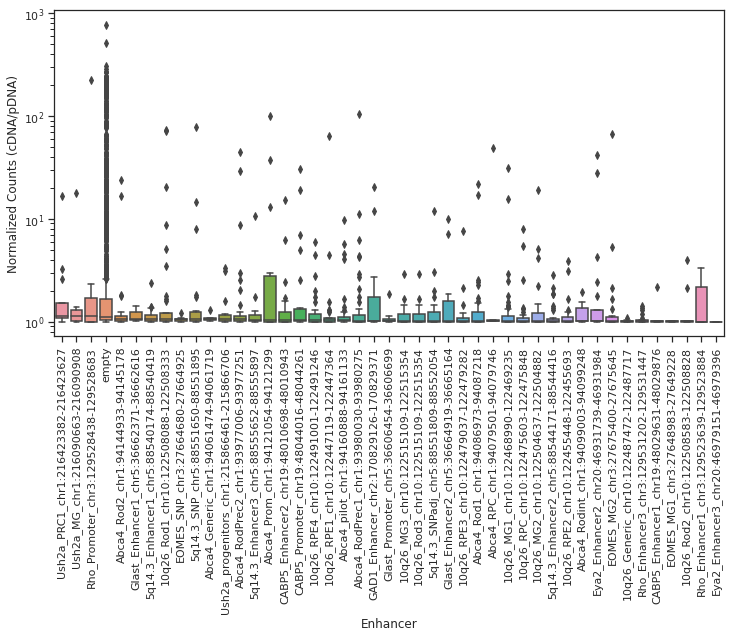

In [32]:
Counts_above100.sort_values('median', ascending = False, inplace= True)
sns.set(style='ticks')
plt.figure(figsize=(12,6))
plot_all = sns.boxplot(x='ID',
                  y='Normalized_Counts',
                  data = Counts_above100)
plt.yscale('log')
plot_all.tick_params(axis = 'x', rotation=90)
plt.xlabel('Enhancer')
plt.ylabel('Normalized Counts (cDNA/pDNA)')
plt.savefig("/active/cherry_t/Manuscripts/In Preparation/2024_scATAC_ML/Twist_Counts_above100_boxplot_noempty.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [33]:
Counts_above100['ID'].value_counts()

empty                                         1900
Abca4_Rod1_chr1:94086973-94087218               63
Abca4_RodPrec1_chr1:93980030-93980275           56
5q14.3_Enhancer1_chr5:88540174-88540419         49
10q26_MG1_chr10:122468990-122469235             43
Abca4_pilot_chr1:94160888-94161133              42
10q26_Rod1_chr10:122508088-122508333            37
5q14.3_Enhancer2_chr5:88544171-88544416         37
Abca4_RodPrec2_chr1:93977006-93977251           36
10q26_RPE4_chr10:122491001-122491246            34
10q26_Rod3_chr10:122515109-122515354            34
10q26_MG3_chr10:122515109-122515354             34
10q26_RPC_chr10:122475603-122475848             34
Abca4_Rod2_chr1:94144933-94145178               32
5q14.3_SNP_chr5:88551650-88551895               30
10q26_RPE1_chr10:122447119-122447364            29
GAD1_Enhancer_chr2:170829126-170829371          28
EOMES_MG2_chr3:27675400-27675645                28
CABP5_Promoter_chr19:48044016-48044261          27
CABP5_Enhancer2_chr19:48010698-

In [34]:
Counts_above100.describe()

,pDNA_counts,cDNA_counts,Normalized_Counts,mean,median
count,2.902000e+03,2.902000e+03,2902.000000,2902.000000,2902.000000
mean,5.673296e+04,3.112957e+05,7.674931,7.674931,1.077024
std,1.842288e+06,4.348469e+06,32.370886,4.058711,0.035151
min,1.000000e+02,1.000000e+02,1.000000,1.000000,1.000000
25%,1.520000e+02,2.000000e+02,1.016985,3.232633,1.035328
50%,2.920000e+02,5.320000e+02,1.074074,10.344769,1.099962
75%,1.651000e+03,6.247000e+03,1.416908,10.344769,1.099962
max,9.849891e+07,1.429135e+08,762.280000,28.908032,1.142857
